已加载 8,185 个废水集水区


,reference,company,name,comment,identifier,geometry
0,DOA000001,scottish_water,Kilmore DOA,None,02c6f0e5a0,"POLYGON ((1.88e+05 7.26e+05, 1.88e+05 7.26e+05..."
1,DOA000002,scottish_water,Luss DOA,None,240b0a9f07,"POLYGON ((2.36e+05 6.93e+05, 2.36e+05 6.93e+05..."
2,DOA000003,scottish_water,Rothesay DOA,None,382f95fed3,"POLYGON ((2.08e+05 6.67e+05, 2.08e+05 6.67e+05..."
3,DOA000004,scottish_water,Clachan DOA,None,210f3df954,"POLYGON ((1.76e+05 6.56e+05, 1.76e+05 6.56e+05..."
4,DOA000005,scottish_water,Campbeltown DOA,None,882800b2be,"POLYGON ((1.71e+05 6.22e+05, 1.71e+05 6.22e+05..."


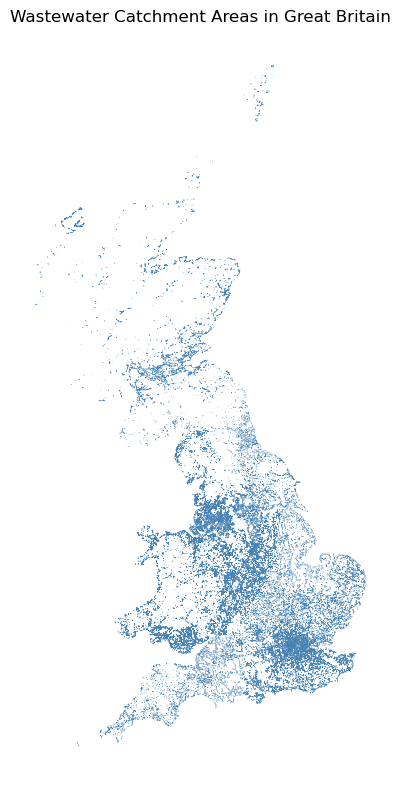

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd


shp_path = Path("catchments_consolidated/catchments_consolidated.shp")

# read data
catchments = gpd.read_file(shp_path)
print(f"已加载 {len(catchments):,} 个废水集水区")
display(catchments.head())         


if catchments.crs and catchments.crs.to_epsg() != 4326:
    catchments = catchments.to_crs(4326)    

# show map
fig, ax = plt.subplots(figsize=(6, 8))
catchments.boundary.plot(ax=ax, linewidth=0.2, edgecolor="steelblue")
ax.set_title("Wastewater Catchment Areas in Great Britain")
ax.set_axis_off()       

plt.tight_layout()                 
plt.savefig("catchment_map.png",   
            dpi=300,               
            bbox_inches="tight")   
plt.show()                         

#First, read the relevant geographical data of the wastewater collection area, including the regional code, 
#geographical location and geographical attributes. Then, in the UK region, the distribution of catchment areas is presented, and we can observe the most basic data on the distribution of catchment areas.

In [8]:
import pandas as pd


lsoa_lookup = pd.read_csv("lsoa_catchment_lookup.csv")
print(f"Lookup 记录数：{len(lsoa_lookup):,}")


catch_enwa = catchments[catchments.company != "scottish_water"].copy()
print(f"过滤后英格威集水区数：{len(catch_enwa):,}")


catch_lsoa = catch_enwa.merge(
    lsoa_lookup,
    on="identifier",
    how="left"
)

print(f"合并后记录数：{len(catch_lsoa):,}")
display(catch_lsoa[["identifier","name","company","LSOA11CD","intersection_area","geometry"]].head(10))

Lookup 记录数：45,271
过滤后英格威集水区数：6,308
合并后记录数：45,271


,identifier,name,company,LSOA11CD,intersection_area,geometry
0,6e237d7d4f,ABBESS RODING STW,thames_water,E01021768,177231.272895,"MULTIPOLYGON (((0.28756 51.769, 0.28754 51.769..."
1,6e237d7d4f,ABBESS RODING STW,thames_water,E01021769,160934.444886,"MULTIPOLYGON (((0.28756 51.769, 0.28754 51.769..."
2,6e237d7d4f,ABBESS RODING STW,thames_water,E01021796,157677.752105,"MULTIPOLYGON (((0.28756 51.769, 0.28754 51.769..."
3,a3aea16d4a,ABINGDON STW,thames_water,E01028691,245795.515753,"MULTIPOLYGON (((-1.2915 51.659, -1.2914 51.659..."
4,a3aea16d4a,ABINGDON STW,thames_water,E01028702,263935.503395,"MULTIPOLYGON (((-1.2915 51.659, -1.2914 51.659..."
5,a3aea16d4a,ABINGDON STW,thames_water,E01028703,270362.787816,"MULTIPOLYGON (((-1.2915 51.659, -1.2914 51.659..."
6,a3aea16d4a,ABINGDON STW,thames_water,E01028698,866524.622349,"MULTIPOLYGON (((-1.2915 51.659, -1.2914 51.659..."
7,a3aea16d4a,ABINGDON STW,thames_water,E01028738,518771.044668,"MULTIPOLYGON (((-1.2915 51.659, -1.2914 51.659..."
8,a3aea16d4a,ABINGDON STW,thames_water,E01028697,272515.743041,"MULTIPOLYGON (((-1.2915 51.659, -1.2914 51.659..."
9,a3aea16d4a,ABINGDON STW,thames_water,E01028750,414912.669137,"MULTIPOLYGON (((-1.2915 51.659, -1.2914 51.659..."


In [9]:

resident = pd.read_csv("常住人口.csv")
print("人口表前几行：")
display(resident.head())
resident = resident.rename(columns={"Total":"pop_total"})


catch_lsoa = catch_lsoa.merge(
    resident[["LSOA11CD","pop_total"]],
    on="LSOA11CD",
    how="left"
)
print("合并后检查：")
display(catch_lsoa[["identifier","LSOA11CD","intersection_area","pop_total"]].head(10))

#Next, read the population data of the UK region and associate it with the above catchment area 
#geographical table to facilitate our subsequent linear analysis of the population and the number of catchment areas in the region.


人口表前几行：


,LSOA11CD,Total
0,E01011949,"1,854"
1,E01011950,"1,037"
2,E01011951,"1,203"
3,E01011952,"1,610"
4,E01011953,"1,970"


合并后检查：


,identifier,LSOA11CD,intersection_area,pop_total
0,6e237d7d4f,E01021768,177231.272895,"2,343"
1,6e237d7d4f,E01021769,160934.444886,"2,475"
2,6e237d7d4f,E01021796,157677.752105,"2,366"
3,a3aea16d4a,E01028691,245795.515753,"1,758"
4,a3aea16d4a,E01028702,263935.503395,"1,202"
5,a3aea16d4a,E01028703,270362.787816,"1,728"
6,a3aea16d4a,E01028698,866524.622349,"1,434"
7,a3aea16d4a,E01028738,518771.044668,"1,940"
8,a3aea16d4a,E01028697,272515.743041,"1,624"
9,a3aea16d4a,E01028750,414912.669137,"1,360"


In [10]:

lsoa_cov = pd.read_csv("lsoa_coverage.csv")
print("coverage 列名：", lsoa_cov.columns.tolist())




catch_lsoa = catch_lsoa.merge(
    lsoa_cov[['LSOA11CD','total_area']],
    on="LSOA11CD",
    how="left"
)

print("合并后 catch_lsoa 列名：", catch_lsoa.columns.tolist())

coverage 列名： ['LSOA11CD', 'total_area', 'area_covered']
合并后 catch_lsoa 列名： ['reference', 'company', 'name', 'comment', 'identifier', 'geometry', 'LSOA11CD', 'intersection_area', 'pop_total', 'total_area']


In [55]:

# 假设 catch_lsoa 已经包含：
# 'intersection_area', 'total_area', 'pop_total' 三列
# 但它们可能是 str，需要先清洗、转成 float

for col in ["intersection_area", "total_area", "pop_total"]:
    # 1) 强制转 str
    catch_lsoa[col] = catch_lsoa[col].astype(str)
    # 2) 去掉千分位逗号
    catch_lsoa[col] = catch_lsoa[col].str.replace(",", "")
    # 3) 转为数字，非数值自动变 NaN
    catch_lsoa[col] = pd.to_numeric(catch_lsoa[col], errors="coerce")

# 检查一下转换结果
print(catch_lsoa[["intersection_area","total_area","pop_total"]].dtypes)
print(catch_lsoa[["intersection_area","total_area","pop_total"]].head())

# 再次做面积加权
catch_lsoa["pop_weighted"] = (
    catch_lsoa["intersection_area"]
    / catch_lsoa["total_area"]
    * catch_lsoa["pop_total"]
)

# 按 catchment 汇总
pop_by_catch = (
    catch_lsoa
      .groupby("identifier", as_index=False)
      .agg(pop_est      = ("pop_weighted", "sum"),
           total_area_km2 = ("total_area",   "sum"))
)

print(pop_by_catch.head())
#intersection_area refers to the extent to which the LOSA area overlaps with the catchment area
#We calculate the number of people each catchment area can serve through area-weighted calculation
#and then calculate the subsequent density of the number of people served.

intersection_area    float64
total_area           float64
pop_total            float64
dtype: object
   intersection_area    total_area  pop_total
0      177231.272895  2.693882e+07     2343.0
1      160934.444886  4.585981e+07     2475.0
2      157677.752105  4.359090e+07     2366.0
3      245795.515753  3.254338e+05     1758.0
4      263935.503395  8.340288e+05     1202.0
   identifier       pop_est  total_area_km2
0  000deaad90    123.511276    3.682859e+07
1  002b4939d1     49.110731    8.774620e+07
2  002d3b2ccf      2.408251    1.241101e+07
3  00310b4c3b     16.817696    3.210427e+07
4  0040dfa94f  12472.912795    4.054775e+07


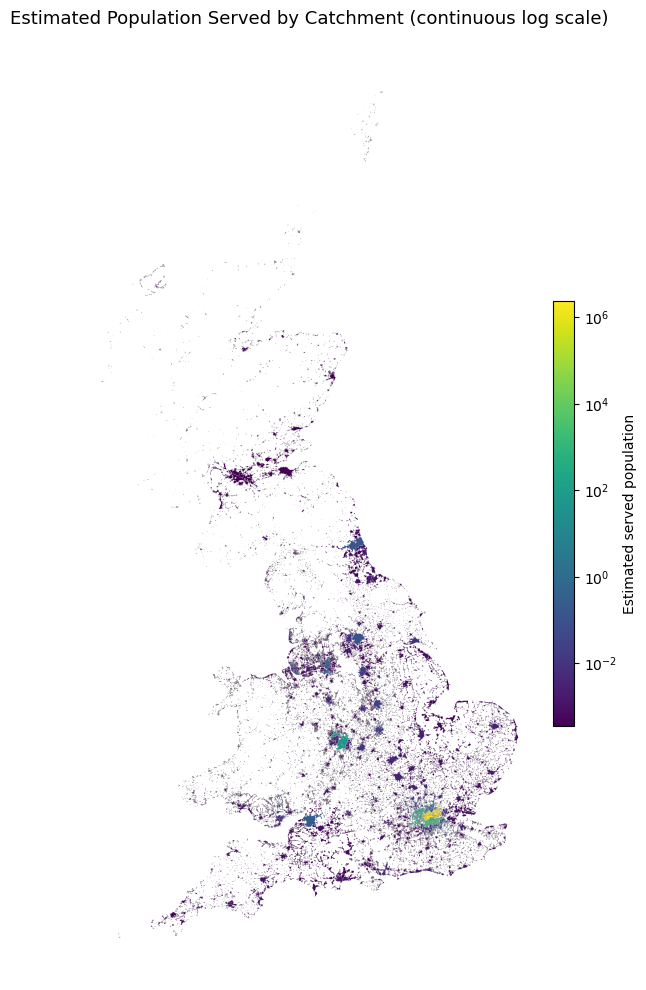

In [44]:

import geopandas as gpd
catchments = gpd.read_file("catchments_consolidated/catchments_consolidated.shp")


pop_geo = catchments[["identifier","geometry"]].merge(
    pop_by_catch,          
    on="identifier",
    how="left"
)

pop_geo["pop_est"] = pop_geo["pop_est"].fillna(0)

pop_geo = gpd.GeoDataFrame(pop_geo, geometry="geometry", crs=catchments.crs)



import matplotlib.pyplot as plt, numpy as np, matplotlib.colors as mcolors

cmap     = plt.cm.viridis
log_norm = mcolors.LogNorm(
    vmin=pop_geo["pop_est"].replace(0, np.nan).min(),
    vmax=pop_geo["pop_est"].max()
)

fig, ax = plt.subplots(figsize=(8,10))
pop_geo.plot(
    column    = "pop_est",
    cmap      = cmap,
    vmin      = log_norm.vmin,
    vmax      = log_norm.vmax,
    linewidth = 0.05,
    edgecolor = "gray",
    ax        = ax,
    legend    = False
)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=log_norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label("Estimated served population")

ax.set_title("Estimated Population Served by Catchment (continuous log scale)", fontsize=13)
ax.set_axis_off()
plt.tight_layout()
plt.show()
# This graph visualizes the number of people serving in the catchment area. 
# We can directly observe the status of the number of people monitored in different catchment areas.

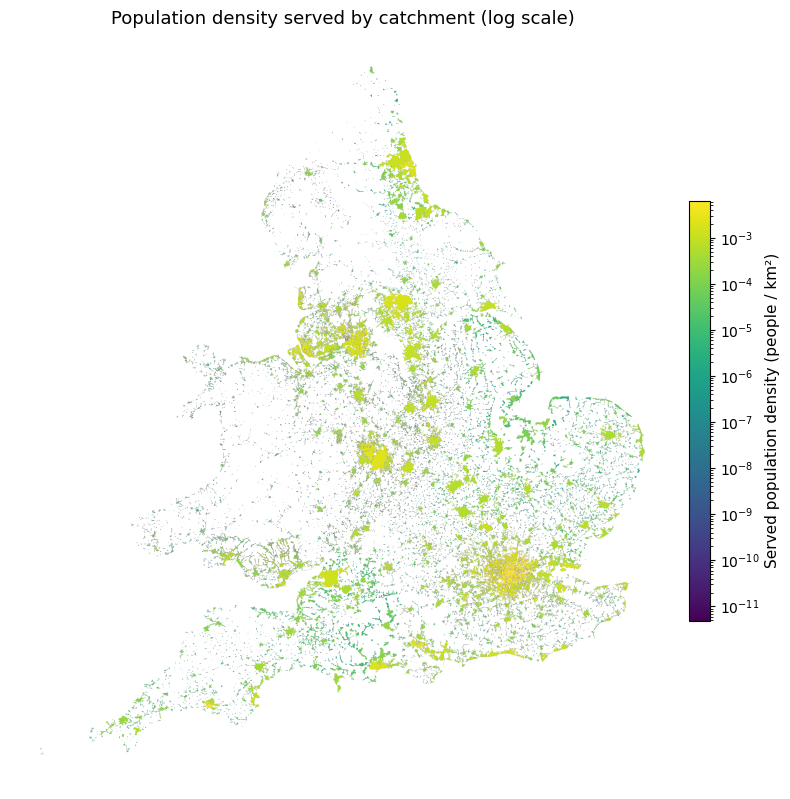

In [58]:
import geopandas as gpd
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib.colors  as mcolors



catch = (gpd.read_file("catchments_consolidated/catchments_consolidated.shp")
           [["identifier", "geometry"]])


pop_geo = catch.merge(pop_by_catch, on="identifier", how="left")


pop_geo["pop_est"]   = pop_geo["pop_est"].fillna(0)
pop_geo["total_area_km2"] = pop_geo["total_area_km2"].replace(0, np.nan)
pop_geo["pop_dens"]  = pop_geo["pop_est"] / pop_geo["total_area_km2"]


cmap = plt.cm.viridis
norm = mcolors.LogNorm(
        vmin = pop_geo["pop_dens"].replace(0, np.nan).min(),
        vmax = pop_geo["pop_dens"].max())

fig, ax = plt.subplots(1, 1, figsize=(8, 10))
pop_geo.plot(column="pop_dens",
             cmap=cmap, norm=norm,
             linewidth=0.05, edgecolor="gray",
             legend=False, ax=ax)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label("Served population density (people / km²)", fontsize=11)

ax.set_title("Population density served by catchment (log scale)", fontsize=13)
ax.set_axis_off()
plt.tight_layout()

plt.savefig("catchment_pop_density.png", dpi=300, bbox_inches="tight")
plt.show()

   active_decile  total_active  covered_active  coverage_rate
0              1      872988.0    6.886128e+05       0.788800
1              2     1560646.0    1.173209e+06       0.751746
2              3     1666275.0    1.224020e+06       0.734585
3              4     1846294.0    1.363445e+06       0.738476
4              5     1929384.0    1.409734e+06       0.730666
5              6     1985768.0    1.410182e+06       0.710144
6              7     2189059.0    1.510843e+06       0.690179
7              8     2303799.0    1.596847e+06       0.693137
8              9     2540543.0    1.739023e+06       0.684508
9             10     3252269.0    2.109753e+06       0.648702


/var/folders/v2/00ywf7cs7hl2r3jq7gnsbxk80000gn/T/ipykernel_68282/1969304298.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


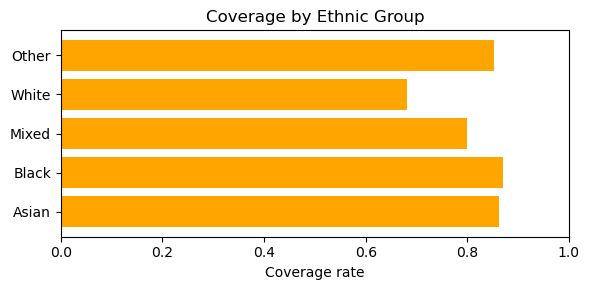

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cov = pd.read_csv("lsoa_coverage.csv") 
cov = cov[["LSOA11CD", "total_area", "area_covered"]]
cov["pct_cov"] = cov["area_covered"] / cov["total_area"]

act = pd.read_csv("经济活跃人数_拆分后.csv") 
act = act.rename(columns={"Total": "active_count"})[["LSOA11CD", "active_count"]]


eth = pd.read_csv("ethics_group_split.csv")  
eth = eth.rename(columns={
    "Total: All usual residents": "pop_total",
    "Asian, Asian British or Asian Welsh": "Asian",
    "Black, Black British, Black Welsh, Caribbean or African": "Black",
    "Mixed or Multiple ethnic groups": "Mixed",
    "White": "White",
    "Other ethnic group": "Other"
})[["LSOA11CD","Asian","Black","Mixed","White","Other"]]


df = (
    cov[["LSOA11CD","pct_cov"]]
    .merge(act, on="LSOA11CD", how="left")
    .merge(eth, on="LSOA11CD", how="left")
    .fillna(0) 
)


df["active_count"] = pd.to_numeric(df["active_count"], errors="coerce").fillna(0)

df["active_decile"] = pd.qcut(df["active_count"], 10, labels=False) + 1


econ_summary = (
    df.groupby("active_decile")
      .apply(lambda g: pd.Series({
          "total_active":    g["active_count"].sum(),
          "covered_active":  (g["active_count"] * g["pct_cov"]).sum()
      }))
      .assign(coverage_rate=lambda d: d.covered_active / d.total_active)
      .reset_index()
)
4
econ_summary.to_csv("coverage_by_employment_decile.csv", index=False)
print(econ_summary)

eth_groups = ["Asian","Black","Mixed","White","Other"]
eth_coverage = {
    grp: (df[grp] * df["pct_cov"]).sum() / df[grp].sum()
    for grp in eth_groups
}
eth_df = pd.DataFrame.from_dict(eth_coverage, orient="index", columns=["coverage_rate"])
eth_df = eth_df.reset_index().rename(columns={"index":"EthnicGroup"})


eth_df.to_csv("coverage_by_ethnic_group.csv", index=False)


plt.figure(figsize=(6,3))
plt.barh(eth_df["EthnicGroup"], eth_df["coverage_rate"], color="orange")
plt.xlabel("Coverage rate")
plt.title("Coverage by Ethnic Group")
plt.xlim(0,1)
plt.tight_layout()

plt.savefig("coverage_by_ethnic_group.png", dpi=300, bbox_inches="tight")

plt.show()

In [23]:

import numpy as np


cov = (pd.read_csv("lsoa_coverage.csv")
         [["LSOA11CD","total_area","area_covered"]])

for col in ["total_area","area_covered"]:
    cov[col] = (
        cov[col].astype(str)          # 转字符串
               .str.replace(",", "")  # 去逗号
               .astype(float)         # 转 float
    )
cov["pct_cov"] = cov["area_covered"] / cov["total_area"]


pop = pd.read_csv("常住人口.csv")[["LSOA11CD","Total"]]
pop = pop.rename(columns={"LSOA11CD":"LSOA11CD",
                          "Total":"pop_total"})
pop["pop_total"] = (
    pop["pop_total"].astype(str)
                   .str.replace(",", "")
                   .astype(float)
)


lookup = pd.read_csv("LSOA-to-borough-lookup.csv")[["LSOA21CD","LAD23CD"]]


lsoa_cov = (cov
            .merge(pop, on="LSOA11CD", how="left")
            .merge(lookup, left_on="LSOA11CD", right_on="LSOA21CD", how="left")
            .fillna(0))



lsoa_cov["cov_pop"] = lsoa_cov["pct_cov"] * lsoa_cov["pop_total"]


bor_pop = (lsoa_cov.groupby("LAD23CD", as_index=False)["pop_total"].sum()
                        .rename(columns={"pop_total":"borough_pop"}))

bor_cov = (lsoa_cov.groupby("LAD23CD", as_index=False)["cov_pop"].sum())

coverage = (bor_pop
            .merge(bor_cov, on="LAD23CD")
            .assign(coverage_rate=lambda d: d["cov_pop"]/d["borough_pop"])
           )


coverage.to_csv("borough_coverage_rate.csv", index=False)
print("已生成 borough_coverage_rate.csv  —— The first five elements ：")
print(coverage.head())

已生成 borough_coverage_rate.csv  —— 前 5 行：
     LAD23CD  borough_pop       cov_pop  coverage_rate
0          0    2961310.0  1.489091e+06       0.502849
1  E06000001      90624.0  8.185274e+04       0.903213
2  E06000002     132109.0  1.266644e+05       0.958787
3  E06000003     136605.0  1.091035e+05       0.798679
4  E06000004     182708.0  1.650535e+05       0.903373


EDI vs coverage_rate:  r = 0.587,  p = 7.92e-29,  slope = 0.718


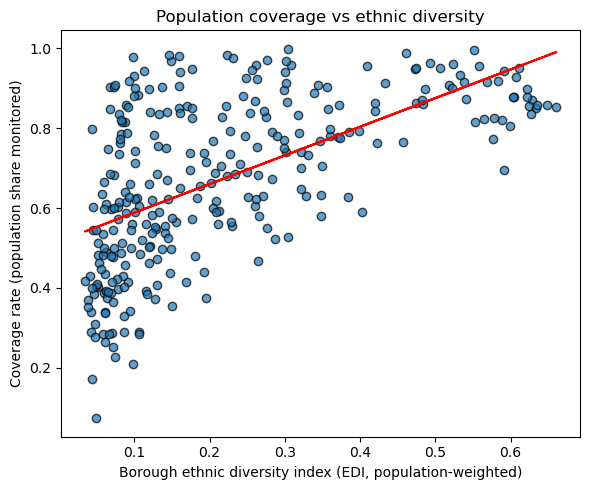

In [48]:
import pandas as pd
import numpy as np
import re
from scipy.stats import linregress
import matplotlib.pyplot as plt


def to_float(s: pd.Series) -> pd.Series:
    """
    1. 转为 str → 去逗号/空格
    2. 删除非数字/小数点/负号字符（应对说明文本）
    3. 用 pd.to_numeric(errors='coerce') 转 float；无效值 → NaN
    """
    return (
        s.astype(str)
         .str.strip()
         .str.replace(",", "", regex=False)
         .apply(lambda x: re.sub(r"[^\d\.\-]", "", x))  # 只保留数字 . -
         .replace({"": np.nan, "nan": np.nan})
         .pipe(pd.to_numeric, errors="coerce")
    )

# --------------------------------------------------
# 1️⃣ 读取 & 计算 LSOA 级多样性指数 (EDI)
# --------------------------------------------------
eth = (pd.read_csv("ethics_group_split.csv", dtype=str)
         .rename(columns={
             "LSOA11CD": "LSOA",
             "Asian, Asian British or Asian Welsh": "Asian",
             "Black, Black British, Black Welsh, Caribbean or African": "Black",
             "Mixed or Multiple ethnic groups": "Mixed",
             "White": "White",
             "Other ethnic group": "Other",
             "Total: All usual residents": "pop_total"
         })
         [["LSOA", "Asian", "Black", "Mixed", "White", "Other", "pop_total"]]
      )


for col in ["Asian","Black","Mixed","White","Other","pop_total"]:
    eth[col] = to_float(eth[col])

groups = ["Asian","Black","Mixed","White","Other"]
p = eth[groups].div(eth["pop_total"], axis=0)
eth["EDI"] = 1 - (p ** 2).sum(axis=1)


lookup = pd.read_csv("LSOA-to-borough-lookup.csv", dtype=str)[["LSOA21CD", "LAD23CD"]]
lsoa_bor = eth.merge(lookup, left_on="LSOA", right_on="LSOA21CD", how="left")


lsoa_bor["EDI_pop"] = lsoa_bor["EDI"] * lsoa_bor["pop_total"]

bor_pop = lsoa_bor.groupby("LAD23CD", as_index=False)["pop_total"].sum()
bor_edi = lsoa_bor.groupby("LAD23CD", as_index=False)["EDI_pop"].sum()

bor_edi = bor_edi.merge(bor_pop, on="LAD23CD")
bor_edi["EDI_weighted"] = bor_edi["EDI_pop"] / bor_edi["pop_total"]


cov = (pd.read_csv("borough_coverage_rate.csv", dtype=str)
         .rename(columns={
             "coverage_rate": "coverage_rate",
             "cov_pop":       "cov_pop",
             "borough_pop":   "borough_pop"
         })
         [["LAD23CD", "coverage_rate", "cov_pop", "borough_pop"]]
      )

cov["coverage_rate"] = to_float(cov["coverage_rate"])   # 确保为浮点
cov["borough_pop"]  = to_float(cov["borough_pop"])
cov["cov_pop"]      = to_float(cov["cov_pop"])


df = (bor_edi.merge(cov, on="LAD23CD")
              .dropna(subset=["EDI_weighted", "coverage_rate"]))

slope, intercept, r, p, _ = linregress(df["EDI_weighted"], df["coverage_rate"])
print(f"EDI vs coverage_rate:  r = {r:.3f},  p = {p:.2e},  slope = {slope:.3f}")


plt.figure(figsize=(6,5))
plt.scatter(df["EDI_weighted"], df["coverage_rate"], alpha=0.7, edgecolor="k")
x = df["EDI_weighted"]
plt.plot(x, intercept + slope * x, 'r', lw=1.5)
plt.xlabel("Borough ethnic diversity index (EDI, population-weighted)")
plt.ylabel("Coverage rate (population share monitored)")
plt.title("Population coverage vs ethnic diversity")
plt.tight_layout()

plt.savefig("Population coverage vs ethnic diversity.png", dpi=300, bbox_inches="tight")
plt.show()


#Process ethnic data, define ethnic richness, and study the linear relationship between ethnic diversity and population coverage and ethnic diversity in catchment areas.

In [25]:
import statsmodels.api as sm

# ---------- 5′ 合并 & 回归（statsmodels 版本） ----------
df = bor_edi.merge(cov, on="LAD23CD").dropna(subset=["EDI_weighted","coverage_rate"])

X = sm.add_constant(df["EDI_weighted"])          # 加截距项
y = df["coverage_rate"]

model = sm.OLS(y, X).fit()
print(model.summary())     # 打印完整表

# 提取常用指标
r2      = model.rsquared
r2_adj  = model.rsquared_adj
slope   = model.params["EDI_weighted"]
p_value = model.pvalues["EDI_weighted"]

print(f"\n简表:  R²={r2:.3f}, adj-R²={r2_adj:.3f}, slope={slope:.3f}, p={p_value:.2e}")
# Ethnic distribution and the covered population show a strong correlation
# that is, the higher the ethnic richness, the higher the coverage of the catchment area.
# This indicates that WBE is more inclined to be located in areas with a higher ethnic diversity。

                            OLS Regression Results                            
Dep. Variable:          coverage_rate   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     154.7
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           7.92e-29
Time:                        21:53:10   Log-Likelihood:                 109.97
No. Observations:                 296   AIC:                            -215.9
Df Residuals:                     294   BIC:                            -208.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5166      0.016     32.368   

In [26]:
import geopandas as gpd
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt


bor = gpd.read_file("london-borough/LAD_DEC_2021_GB_BGC.shp")[["LAD21CD","geometry"]]
bor = bor.to_crs(epsg=4326)


plants = pd.read_csv("waterbase_consolidated.csv").dropna(subset=["uwwLongitude","uwwLatitude"])
plants_gdf = gpd.GeoDataFrame(
    plants,
    geometry=gpd.points_from_xy(plants.uwwLongitude, plants.uwwLatitude),
    crs="EPSG:4326"
)

joined = gpd.sjoin(plants_gdf, bor, how="inner", predicate="within")
site_counts = joined.groupby("LAD21CD").size().reset_index(name="site_count")



In [27]:
print(plants_gdf.crs, bor.crs)

EPSG:4326 EPSG:4326


In [28]:
# 3) 读取并计算 site_counts
joined = gpd.sjoin(plants_gdf, bor, how="inner", predicate="within")
site_counts = joined.groupby("LAD21CD").size().reset_index(name="site_count")
print("站点计数 (site_counts)：", site_counts.shape)
print(site_counts.head())

# 4) 读取 GDP
gdp = pd.read_csv("uk-borough_GDP.csv")[["LAD21CD","gdp_per_head"]]
print("GDP 数据：", gdp.shape)
print(gdp.head())

# 5) 合并
df = site_counts.merge(gdp, on="LAD21CD", how="inner")
print("合并后 df：", df.shape)
print(df.head())

站点计数 (site_counts)： (309, 2)
     LAD21CD  site_count
0  E06000001           7
1  E06000003          11
2  E06000004          15
3  E06000005          10
4  E06000006          13
GDP 数据： (361, 2)
     LAD21CD gdp_per_head
0  E06000001       17,512
1  E06000004       31,393
2  E06000002       24,821
3  E06000003       16,091
4  E06000005       26,372
合并后 df： (292, 3)
     LAD21CD  site_count gdp_per_head
0  E06000001           7       17,512
1  E06000003          11       16,091
2  E06000004          15       31,393
3  E06000005          10       26,372
4  E06000006          13       37,200


Pearson r = -0.110, p = 5.94e-02
Slope = -0.0004, Intercept = 52.3


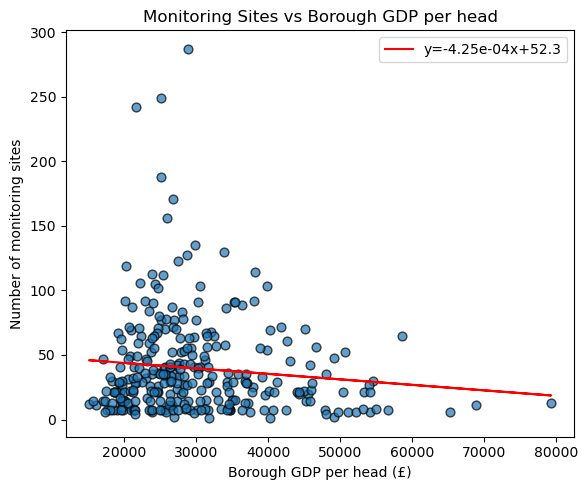

In [51]:
gdp = pd.read_csv("uk-borough_GDP.csv")  # 包含 LAD21CD 和 gdp_per_head

gdp["gdp_per_head"] = (
    gdp["gdp_per_head"]
      .astype(str)
      .str.replace(",", "")
      .astype(float)
)


df = site_counts.merge(gdp, on="LAD21CD", how="inner")


from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(
    df["gdp_per_head"],
    df["site_count"]
)
print(f"Pearson r = {r_value:.3f}, p = {p_value:.2e}")
print(f"Slope = {slope:.4f}, Intercept = {intercept:.1f}")


import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(df["gdp_per_head"], df["site_count"], s=40, alpha=0.7, edgecolor="k")
x = df["gdp_per_head"]
plt.plot(x, intercept + slope*x, color="red", lw=1.5, label=f"y={slope:.2e}x+{intercept:.1f}")
plt.xlabel("Borough GDP per head (£)")
plt.ylabel("Number of monitoring sites")
plt.title("Monitoring Sites vs Borough GDP per head")
plt.legend()
plt.tight_layout()

plt.savefig("Monitoring Sites vs Borough GDP per head.png", dpi=300, bbox_inches="tight")
plt.show()


df.to_csv("borough_sitecount_vs_gdp.csv", index=False)

#Through the analysis of borough areas, we find that the more developed the per capita GDP of a region is, the fewer the catchment areas will be, that is, there will be a negative correlation. 
#This means that there will be relatively fewer monitoring points in wealthy areas.

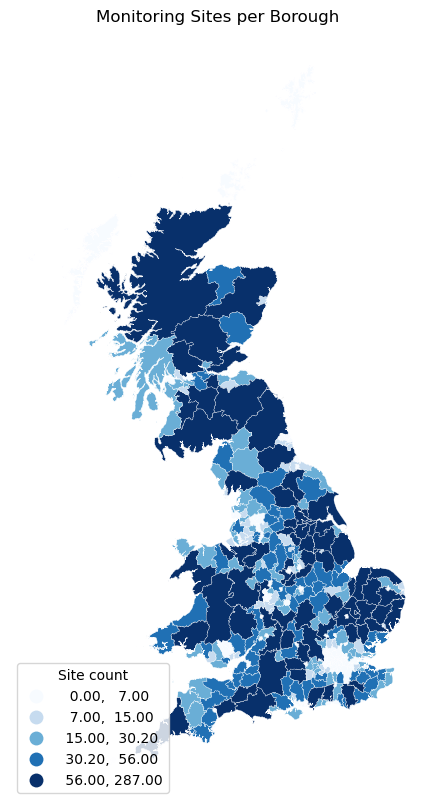

In [30]:
import geopandas as gpd


bor = gpd.read_file("london-borough/LAD_DEC_2021_GB_BGC.shp")[["LAD21CD","geometry"]].to_crs(epsg=4326)


bor_map = bor.merge(site_counts, on="LAD21CD", how="left").fillna(0)


fig, ax = plt.subplots(1,1,figsize=(8,10))
bor_map.plot(
    column="site_count",
    cmap="Blues",      
    scheme="quantiles",
    k=5,
    legend=True,
    ax=ax,
    edgecolor="white",
    linewidth=0.2,
    legend_kwds={
       "title": "Site count",
       "loc": "lower left"
    },
    missing_kwds={"color":"lightgrey"}
)
ax.set_axis_off()
ax.set_title("Monitoring Sites per Borough")
plt.show()

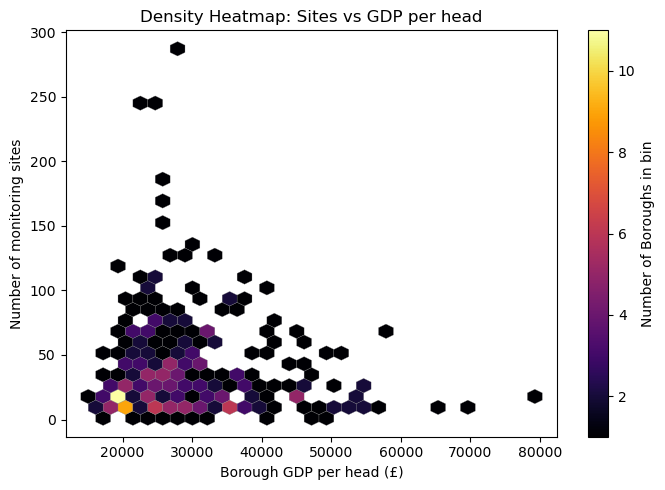

In [31]:
import matplotlib.pyplot as plt


x = df["gdp_per_head"]
y = df["site_count"]

plt.figure(figsize=(7,5))
hb = plt.hexbin(
    x, y,
    gridsize=30,           
    cmap="inferno",
    mincnt=1,               
    linewidths=0.2,
    edgecolors="grey"
)
cb = plt.colorbar(hb)
cb.set_label("Number of Boroughs in bin")

plt.xlabel("Borough GDP per head (£)")
plt.ylabel("Number of monitoring sites")
plt.title("Density Heatmap: Sites vs GDP per head")
plt.tight_layout()
plt.show()

In [59]:
import pandas as pd
import numpy as np
cov = pd.read_csv("lsoa_coverage.csv", dtype={"LSOA11CD": str})
for c in ["total_area", "area_covered"]:
    cov[c] = pd.to_numeric(cov[c], errors="coerce")


lk = pd.read_csv("LSOA-to-borough-lookup.csv", dtype=str)

if "LSOA21CD" in lk.columns:
    lk = lk[["LSOA21CD", "LAD23CD"]].rename(columns={"LSOA21CD": "LSOA"})
elif "LSOA11CD" in lk.columns:
    lk = lk[["LSOA11CD", "LAD23CD"]].rename(columns={"LSOA11CD": "LSOA"})
else:
    raise ValueError("在 LSOA-to-borough-lookup.csv 里没有找到 LSOA11CD 或 LSOA21CD，请检查列名。")


cov = cov.rename(columns={"LSOA11CD": "LSOA"})


cov_lad = cov.merge(lk, on="LSOA", how="left")

miss = cov_lad["LAD23CD"].isna().sum()
if miss > 0:
    print(f"警告：有 {miss} 个 LSOA 没能匹配到 LAD23CD，请检查 lookup 是否完整。")


borough_area = (
    cov_lad.groupby("LAD23CD", as_index=False)
           .agg(borough_total_area   = ("total_area",   "sum"),
                borough_area_covered = ("area_covered", "sum"))
)


borough_area["area_coverage_rate"] = (
    borough_area["borough_area_covered"] / borough_area["borough_total_area"]
)

borough_area["borough_total_area_km2"]   = borough_area["borough_total_area"] / 1e6
borough_area["borough_area_covered_km2"] = borough_area["borough_area_covered"] / 1e6

borough_area.to_csv("borough_area_from_lsoa.csv", index=False)
print("已导出：borough_area_from_lsoa.csv")
print(borough_area.head())

警告：有 2943 个 LSOA 没能匹配到 LAD23CD，请检查 lookup 是否完整。
已导出：borough_area_from_lsoa.csv
     LAD23CD  borough_total_area  borough_area_covered  area_coverage_rate  borough_total_area_km2  borough_area_covered_km2
0  E06000001        9.328951e+07          3.970671e+07            0.425629               93.289509                 39.706715
1  E06000002        4.231061e+07          3.527938e+07            0.833819               42.310612                 35.279385
2  E06000003        2.448535e+08          7.603650e+07            0.310539              244.853522                 76.036498
3  E06000004        1.960453e+08          8.905331e+07            0.454249              196.045304                 89.053314
4  E06000005        1.941238e+08          5.211606e+07            0.268468              194.123791                 52.116062


In [60]:
import pandas as pd
import numpy as np


area = pd.read_csv("borough_area_from_lsoa.csv", dtype={"LAD23CD": str})


cov = (pd.read_csv("borough_coverage_rate.csv", dtype={"LAD23CD": str})
         .rename(columns={
            
            "borough_pop": "borough_pop",
            "cov_pop":     "cov_pop",
            "coverage_rate": "coverage_rate"
         }))


df = (area.merge(cov, on="LAD23CD", how="left")
          .dropna(subset=["borough_pop"]))  


df["pop_density_km2"] = df["borough_pop"] / df["borough_total_area_km2"]


df["served_pop_density_km2"] = (
    df["cov_pop"] / df["borough_area_covered_km2"].replace({0: np.nan})
)


df["served_pop_over_total_km2"] = df["cov_pop"] / df["borough_total_area_km2"]


df["cov_pop_share"] = df["cov_pop"] / df["borough_pop"]


df.to_csv("borough_area_pop_combined.csv", index=False)
print("已导出 borough_area_pop_combined.csv")
df.head()

已导出 borough_area_pop_combined.csv


,LAD23CD,borough_total_area,borough_area_covered,area_coverage_rate,borough_total_area_km2,borough_area_covered_km2,borough_pop,cov_pop,coverage_rate,pop_density_km2,served_pop_density_km2,served_pop_over_total_km2,cov_pop_share
0,E06000001,9.328951e+07,3.970671e+07,0.425629,93.289509,39.706715,90624.0,81852.735083,0.903213,971.427564,2061.433077,877.405577,0.903213
1,E06000002,4.231061e+07,3.527938e+07,0.833819,42.310612,35.279385,132109.0,126664.425051,0.958787,3122.360912,3590.324115,2993.679838,0.958787
2,E06000003,2.448535e+08,7.603650e+07,0.310539,244.853522,76.036498,136605.0,109103.515318,0.798679,557.904982,1434.883482,445.586873,0.798679
3,E06000004,1.960453e+08,8.905331e+07,0.454249,196.045304,89.053314,182708.0,165053.521673,0.903373,931.968257,1853.423685,841.915203,0.903373
4,E06000005,1.941238e+08,5.211606e+07,0.268468,194.123791,52.116062,100673.0,89043.388341,0.884481,518.602070,1708.559411,458.693845,0.884481


In [66]:
import pandas as pd
import numpy as np

gdp = pd.read_csv("uk-borough_GDP.csv")


if "LAD21CD" in gdp.columns and "LAD23CD" not in gdp.columns:
    gdp = gdp.rename(columns={"LAD21CD": "LAD23CD"})



In [67]:
print(gdp.columns.tolist())

print(gdp.head())


assert "LAD23CD" in gdp.columns, "LAD23CD 还没改出来"
assert "LAD21CD" not in gdp.columns, "还残留 LAD21CD 列，没改干净"


print("LAD23CD 缺失值个数：", gdp["LAD23CD"].isna().sum())


ok_ratio = gdp["LAD23CD"].astype(str).str.match(r"^E\d{8}$").mean()
print(f"符合 LAD23CD 代码格式的比例：{ok_ratio:.2%}")

['ITL1 Region', 'LAD23CD', 'LA name', 'gdp_per_head']
  ITL1 Region    LAD23CD               LA name gdp_per_head
0  North East  E06000001            Hartlepool       17,512
1  North East  E06000004      Stockton-on-Tees       31,393
2  North East  E06000002         Middlesbrough       24,821
3  North East  E06000003  Redcar and Cleveland       16,091
4  North East  E06000005            Darlington       26,372
LAD23CD 缺失值个数： 0
符合 LAD23CD 代码格式的比例：81.99%


In [70]:
import pandas as pd


main = pd.read_csv("borough_area_pop_combined.csv")   
gdp  = pd.read_csv("uk-borough_GDP.csv")


def std_lad(df):
    df = df.rename(columns={c: c.strip() for c in df.columns})
    if "LAD23CD" not in df.columns:
        if "LAD21CD" in df.columns:
            df = df.rename(columns={"LAD21CD": "LAD23CD"})
        elif "lad23cd" in df.columns.str.lower():
            # 万一是小写
            df = df.rename(columns={df.columns[df.columns.str.lower()=="lad23cd"][0]:"LAD23CD"})
        else:
            raise KeyError(f"没有找到 LAD23CD（也没有 LAD21CD），当前列名为：{df.columns.tolist()}")
    df["LAD23CD"] = df["LAD23CD"].astype(str).str.strip()
    return df

main = std_lad(main)
gdp  = std_lad(gdp)


gdp = gdp[["LAD23CD", "gdp_per_head"]].drop_duplicates("LAD23CD")

merged = main.merge(gdp, on="LAD23CD", how="left", validate="m:1")

print("合并后缺失 gdp_per_head 的数量：", merged["gdp_per_head"].isna().sum())
print(merged.head())


合并后缺失 gdp_per_head 的数量： 0
     LAD23CD  borough_total_area  borough_area_covered  area_coverage_rate  borough_total_area_km2  borough_area_covered_km2  borough_pop        cov_pop  coverage_rate  pop_density_km2  served_pop_density_km2  served_pop_over_total_km2  cov_pop_share gdp_per_head
0  E06000001        9.328951e+07          3.970671e+07            0.425629               93.289509                 39.706715      90624.0   81852.735083       0.903213       971.427564             2061.433077                 877.405577       0.903213       17,512
1  E06000002        4.231061e+07          3.527938e+07            0.833819               42.310612                 35.279385     132109.0  126664.425051       0.958787      3122.360912             3590.324115                2993.679838       0.958787       24,821
2  E06000003        2.448535e+08          7.603650e+07            0.310539              244.853522                 76.036498     136605.0  109103.515318       0.798679       557.9049

In [71]:

merged["LAD23CD"] = merged["LAD23CD"].astype(str).str.strip()
bor_edi["LAD23CD"] = bor_edi["LAD23CD"].astype(str).str.strip()

final = (merged
         .merge(bor_edi, on="LAD23CD", how="left", validate="m:1"))

print("并完 EDI 后，缺失 EDI_weighted 的数量：", final["EDI_weighted"].isna().sum())
print(final.head())

final.to_csv("borough_model_input.csv", index=False)
print("👉 已导出：borough_model_input.csv")

并完 EDI 后，缺失 EDI_weighted 的数量： 0
     LAD23CD  borough_total_area  borough_area_covered  area_coverage_rate  borough_total_area_km2  borough_area_covered_km2  borough_pop        cov_pop  coverage_rate  pop_density_km2  served_pop_density_km2  served_pop_over_total_km2  cov_pop_share gdp_per_head       EDI_pop  pop_total  EDI_weighted
0  E06000001        9.328951e+07          3.970671e+07            0.425629               93.289509                 39.706715      90624.0   81852.735083       0.903213       971.427564             2061.433077                 877.405577       0.903213       17,512   6222.940037    92341.0      0.067391
1  E06000002        4.231061e+07          3.527938e+07            0.833819               42.310612                 35.279385     132109.0  126664.425051       0.958787      3122.360912             3590.324115                2993.679838       0.958787       24,821  37699.774794   143936.0      0.261920
2  E06000003        2.448535e+08          7.603650e+07     

In [72]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


df = pd.read_csv("borough_model_input.csv", dtype=str)


for col in [
    "cov_pop_share",        
    "EDI_weighted",         
    "area_coverage_rate"    
]:
    df[col] = pd.to_numeric(df[col].str.replace(",", ""), errors="coerce")


df["log_gdp_per_head"]   = np.log(df["gdp_per_head"].str.replace(",", "").astype(float))
df["log_pop_density_km2"]= np.log(df["served_pop_density_km2"].astype(float))


df_model = df.dropna(subset=[
    "cov_pop_share",
    "EDI_weighted",
    "log_gdp_per_head",
    "log_pop_density_km2",
    "area_coverage_rate"
])


y = df_model["cov_pop_share"]
X = df_model[[
    "EDI_weighted",
    "log_gdp_per_head",
    "log_pop_density_km2",
    "area_coverage_rate"
]]
X = sm.add_constant(X)  


model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          cov_pop_share   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     421.1
Date:                Fri, 25 Jul 2025   Prob (F-statistic):          1.19e-119
Time:                        02:18:44   Log-Likelihood:                 292.26
No. Observations:                 296   AIC:                            -574.5
Df Residuals:                     291   BIC:                            -556.1
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1618    

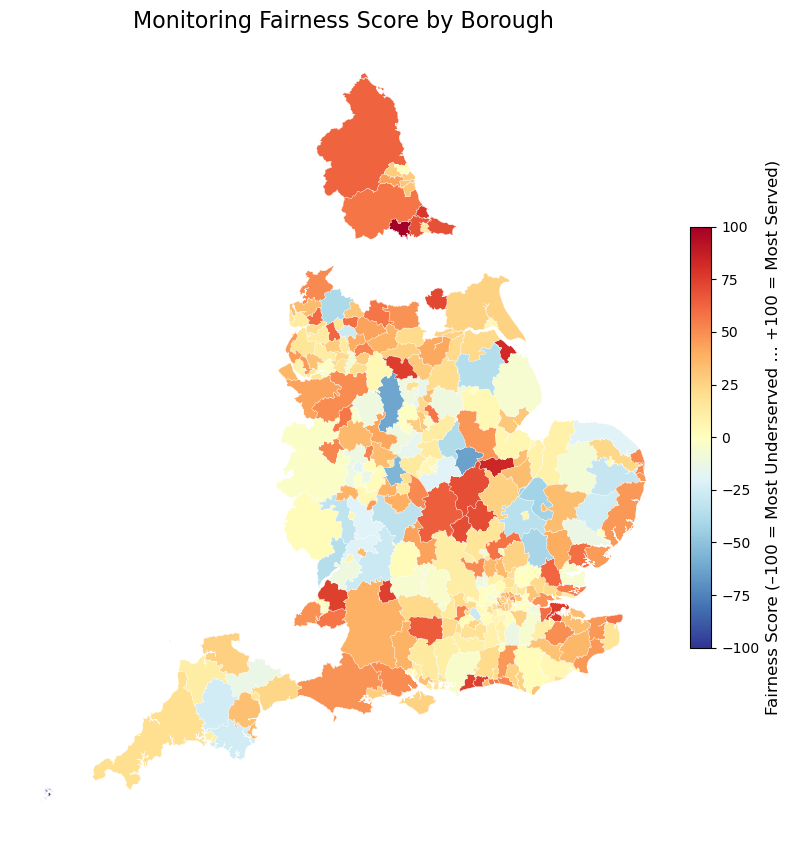

In [83]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("borough_model_input.csv", dtype=str)
# 转为
for col in ["cov_pop_share","EDI_weighted","gdp_per_head","pop_density_km2","area_coverage_rate"]:
    df[col] = df[col].str.replace(",", "").astype(float)

# 2️⃣ 多元线性回归模型：以 cov_pop_share 为因变量
X = df[["EDI_weighted","gdp_per_head","pop_density_km2","area_coverage_rate"]]
X = sm.add_constant(X)
y = df["cov_pop_share"]
model = sm.OLS(y, X).fit(cov_type="HC3")

# 3️⃣ 计算残差并标准化得到 Fairness Score
df["resid"] = y - model.predict(X)
scaler = MinMaxScaler(feature_range=(-1,1))
df["resid_std"] = scaler.fit_transform(df[["resid"]])
df["Fairness_Score"] = df["resid_std"] * 100

# 4️⃣ 读取 Borough 边界
bor = gpd.read_file("london-borough/LAD_DEC_2021_GB_BGC.shp")[["LAD21CD","geometry"]]
bor = bor.rename(columns={"LAD21CD":"LAD23CD"}).to_crs(epsg=4326)

# 5️⃣ 合并 & 去除无数据行
bor_fs = bor.merge(df[["LAD23CD","Fairness_Score"]], on="LAD23CD", how="left")
bor_fs = bor_fs[bor_fs["Fairness_Score"].notna()]

# 6️⃣ 可视化：连续渐变色 Choropleth 地图
fig, ax = plt.subplots(1,1, figsize=(8,10))

# 选一个渐变色，比如 viridis
cmap = plt.cm.viridis
vmin, vmax = -100, 100
bor_fs.plot(
    column="Fairness_Score",
    cmap="RdYlBu_r",
    linewidth=0.2,
    edgecolor="white",
    vmin=vmin,
    vmax=vmax,
    legend=False,  # 先关闭默认 legend
    ax=ax
)

# 自定义 colorbar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="RdYlBu_r", norm=norm)
sm._A = []  # 空数据，纯为了 colorbar
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label("Fairness Score (–100 = Most Underserved … +100 = Most Served)", 
               fontsize=12)

# 标题与样式
ax.set_title("Monitoring Fairness Score by Borough", fontsize=16)
ax.axis("off")
plt.tight_layout()

# 保存
plt.savefig("borough_fairness_score.png", dpi=300, bbox_inches="tight")
plt.show()